In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metrics
from sklearn import metrics


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": False,
	"learning_rate": 1e-3, # 1e-3
	#"learning_rate": 1e-5, # 1e-3	
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence
}

'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
# exp = 177
exp = 185

# if config["training"] == True:
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

185

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

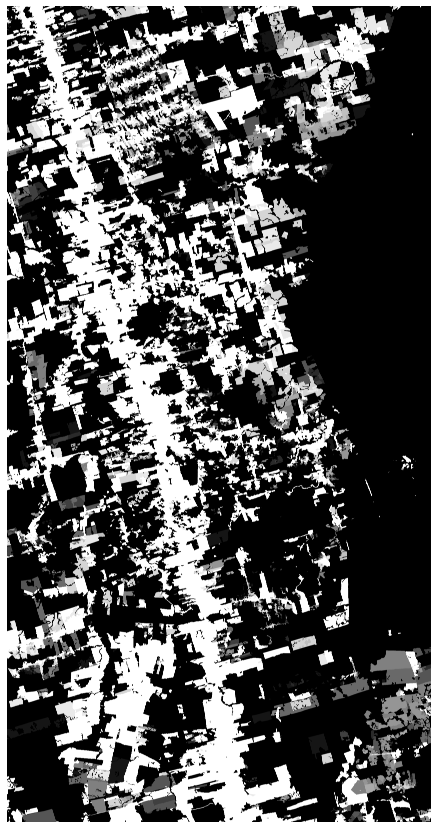

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [18]:
if config["training"] == True:
    trainer.extractCoords()

In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

In [20]:
if config["training"] == True:
    trainer.label_mask.shape

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [25]:
if config["training"] == True:
    inputSnipShow = True

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

In [33]:
if config["training"] == True:
    print(trainer.channels)

In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [35]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [36]:
if config["training"] == True:
    trainer.train()

In [37]:
if config["training"] == True:
    trainer.plotHistory()


In [38]:
if config["training"] == True:
    trainer.plotLossTerms()

In [39]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [40]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

In [41]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp185/models/resunet_0.h5'


time:  0


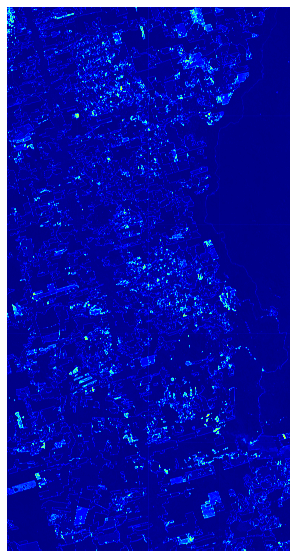

In [48]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [49]:
trainer.loadPredictedProbabilities()


In [50]:
trainer.prob_rec.shape

(17760, 9216)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0057120807
    np.mean(value): 0.028393185
    np.max(value): 0.95011073


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

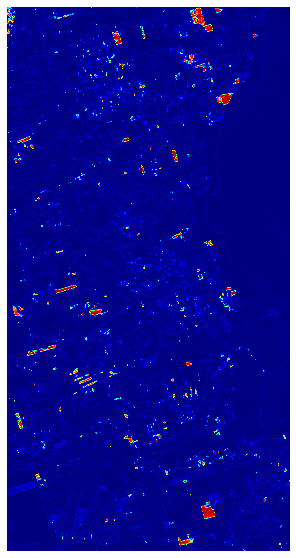

In [54]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

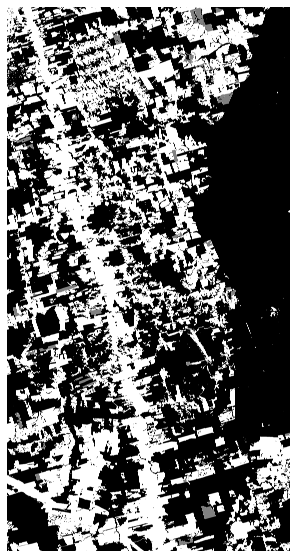

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

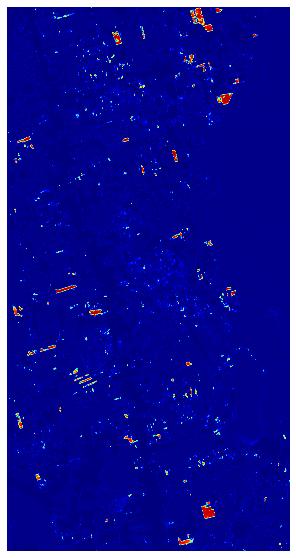

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.021466587
    np.max(value): 0.95011073


In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

86.95


In [62]:
trainer.prob_rec.shape

(17760, 9216)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


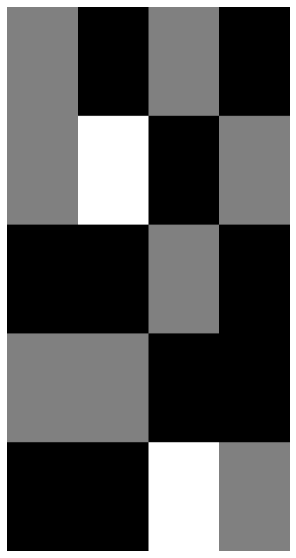

In [64]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [65]:
trainer.getLabelCurrentDeforestation()

In [66]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161187386,   1928614], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [67]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [68]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161187386,   1928614], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161389571,   1726429], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162913815,    202185], dtype=int64))


In [69]:
trainer.calculateMetrics()

ic| self.f1: 81.93, self.precision: 82.94, self.recall: 80.94


In [70]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428722,)
ic| f1_val: 87.35
    precision_val: 85.06
    recall_val: 89.76
    mAP_val: 93.6


In [71]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [72]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162443263,    672737], dtype=int64))


In [73]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [74]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [75]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [76]:
predicted_unpad_to_show.shape

(17730, 9200)

In [77]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

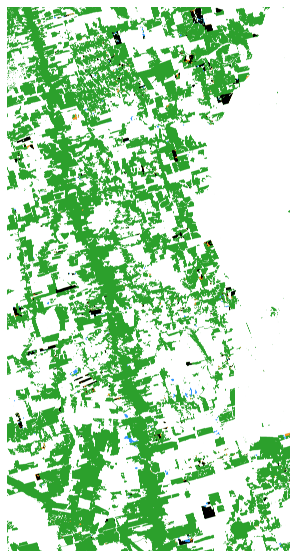

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54134001,)


In [81]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.036941707
    np.max(value): 1.0


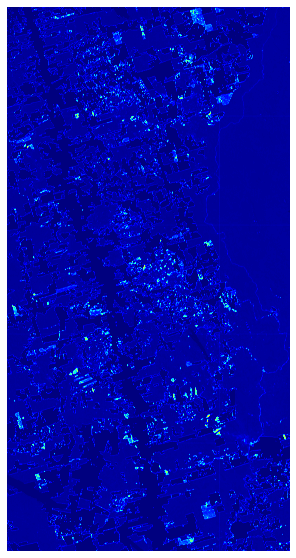

In [82]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


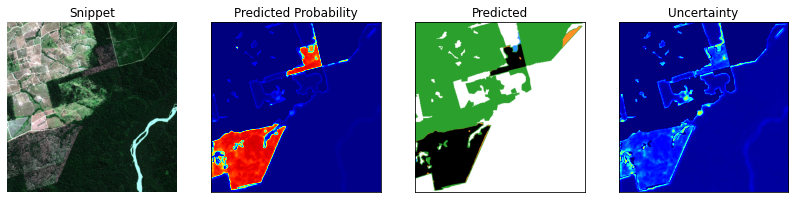

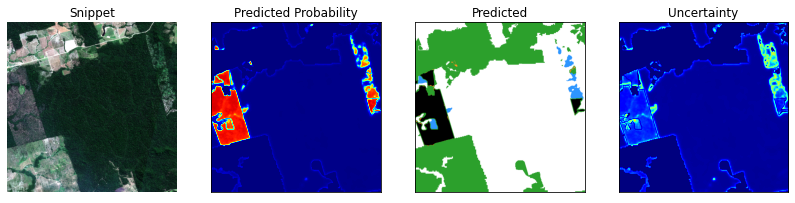

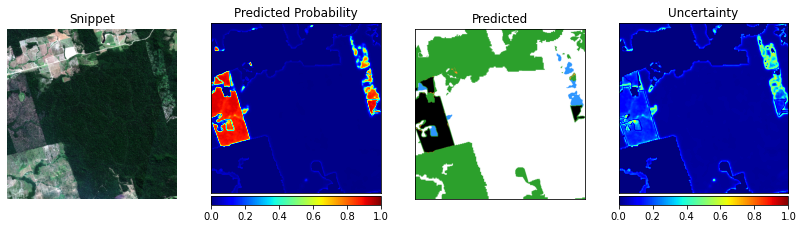

In [83]:
trainer.logger.plotCropSample(trainer)

In [84]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.017136242
    np.mean(value): 0.054349247
    np.max(value): 1.0


In [85]:
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
def getMassFcn(self, alpha = [5, 5, 5]):
        draw_pdf_contours(Dirichlet(alpha))


In [86]:

import types

trainer.getMassFcn = types.MethodType(getMassFcn, trainer)


In [87]:
'''
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]
'''

'\nuncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]\nuncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]\n\npredicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]\nuncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]\n'

In [88]:
'''
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))
'''

'\nprint(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))\nprint(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))\n'

In [89]:
# trainer.getMassFcn()

In [90]:
'''
def getUncertaintyMetrics(uncertainty, label_mask_current_deforestation, 
        predicted, threshold_list):
    metrics_list = []
    for threshold in threshold_list:
        print("threshold", threshold)

        uncertainty_thresholded = np.zeros_like(uncertainty).astype(np.int8)
        uncertainty_thresholded[uncertainty >= threshold] = 1

        predicted_low_uncertainty = predicted[
            uncertainty_thresholded == 0]
        label_current_deforestation_low_uncertainty = label_mask_current_deforestation[
            uncertainty_thresholded == 0]

        predicted_high_uncertainty = predicted[
            uncertainty_thresholded == 1]
        label_current_deforestation_high_uncertainty = label_mask_current_deforestation[
            uncertainty_thresholded == 1]

        print(label_current_deforestation_low_uncertainty.shape,
            predicted_low_uncertainty.shape)
        cm_correct = metrics.confusion_matrix(
            label_current_deforestation_low_uncertainty,
            predicted_low_uncertainty)
        print("cm_correct", cm_correct)

        TN_L = cm_correct[0,0]
        FN_L = cm_correct[1,0]
        TP_L = cm_correct[1,1]
        FP_L = cm_correct[0,1]

        ic(label_current_deforestation_high_uncertainty.shape,
            predicted_high_uncertainty.shape)

        cm_incorrect = metrics.confusion_matrix(
            label_current_deforestation_high_uncertainty,
            predicted_high_uncertainty)

        print("cm_incorrect", cm_incorrect)

        if cm_incorrect.shape[0] != 2: 
            ic(np.all(label_current_deforestation_high_uncertainty) == 0) 
            ic(np.all(predicted_high_uncertainty) == 0) 
             
            precision_L = np.nan 
            recall_L = np.nan 
            recall_Ltotal = np.nan 
            AA = len(label_current_deforestation_high_uncertainty) / len(label_mask_current_deforestation) 
            precision_H = np.nan 
            recall_H = np.nan 
        else:
                        
            TN_H = cm_incorrect[0,0]
            FN_H = cm_incorrect[1,0]
            TP_H = cm_incorrect[1,1]
            FP_H = cm_incorrect[0,1]
            
            precision_L = TP_L / (TP_L + FP_L)
            recall_L = TP_L / (TP_L + FN_L)
            
            precision_H = TP_H / (TP_H + FP_H)
            recall_H = TP_H / (TP_H + FN_H)
            
            recall_Ltotal = TP_L / (TP_L + FN_L + TP_H + FN_H)
            ic((TP_H + FN_H + FP_H + TN_H), len(label_mask_current_deforestation))
            AA = (TP_H + FN_H + FP_H + TN_H) / len(label_mask_current_deforestation)
            ic((TP_H + FN_H + FP_H + TN_H), len(label_mask_current_deforestation))

            UEO = _metrics.getUEO(predicted, label_mask_current_deforestation, uncertainty_thresholded)
        mm = np.hstack((precision_L, recall_L, recall_Ltotal, AA,
                precision_H, recall_H, UEO))
        print(mm)
        metrics_list.append(mm)

        # pdb.set_trace()
    metrics_list = np.asarray(metrics_list)
    return metrics_list
'''

'\ndef getUncertaintyMetrics(uncertainty, label_mask_current_deforestation, \n        predicted, threshold_list):\n    metrics_list = []\n    for threshold in threshold_list:\n        print("threshold", threshold)\n\n        uncertainty_thresholded = np.zeros_like(uncertainty).astype(np.int8)\n        uncertainty_thresholded[uncertainty >= threshold] = 1\n\n        predicted_low_uncertainty = predicted[\n            uncertainty_thresholded == 0]\n        label_current_deforestation_low_uncertainty = label_mask_current_deforestation[\n            uncertainty_thresholded == 0]\n\n        predicted_high_uncertainty = predicted[\n            uncertainty_thresholded == 1]\n        label_current_deforestation_high_uncertainty = label_mask_current_deforestation[\n            uncertainty_thresholded == 1]\n\n        print(label_current_deforestation_low_uncertainty.shape,\n            predicted_low_uncertainty.shape)\n        cm_correct = metrics.confusion_matrix(\n            label_current_de

In [91]:
'''
import types

trainer.getUncertaintyMetrics = types.MethodType(getUncertaintyMetrics, trainer)
'''

'\nimport types\n\ntrainer.getUncertaintyMetrics = types.MethodType(getUncertaintyMetrics, trainer)\n'

In [92]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54134001,)
    self.label_mask_current_deforestation_test.shape: (54134001,)


[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.13
(49371628,) (49371628,)


ic| label_current_deforestation_high_uncertainty.shape: (4762373,)
    predicted_high_uncertainty.shape: (4762373,)


cm_correct [[49276334        0]
 [   17374    77920]]


ic| TP_H + FN_H + FP_H + TN_H: 4762373
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 4762373
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[4000653  122304]
 [ 122656  516760]]
[1.         0.81768002 0.10605545 0.08797379 0.80862011 0.80817496
 0.05124957]
threshold 0.15
(49986166,) (49986166,)


ic| label_current_deforestation_high_uncertainty.shape: (4147835,)
    predicted_high_uncertainty.shape: (4147835,)


cm_correct [[49790125      170]
 [   19943   175928]]


ic| TP_H + FN_H + FP_H + TN_H: 4147835
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 4147835
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[3486862  122134]
 [ 120087  418752]]
[0.99903463 0.89818299 0.2394523  0.07662162 0.77419641 0.77713751
 0.05811517]
threshold 0.2
(51143099,) (51143099,)


ic| label_current_deforestation_high_uncertainty.shape: (2990902,)
    predicted_high_uncertainty.shape: (2990902,)


cm_correct [[50766366     4127]
 [   27115   345491]]


ic| TP_H + FN_H + FP_H + TN_H: 2990902
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2990902
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[2510621  118177]
 [ 112915  249189]]
[0.98819569 0.92722876 0.47024132 0.05524997 0.67831264 0.6881697
 0.07646624]
threshold 0.225
(51597783,) (51597783,)


ic| label_current_deforestation_high_uncertainty.shape: (2536218,)
    predicted_high_uncertainty.shape: (2536218,)


cm_correct [[51163224     9395]
 [   30892   394272]]


ic| TP_H + FN_H + FP_H + TN_H: 2536218
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2536218
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[2113763  112909]
 [ 109138  200408]]
[0.97672587 0.92734098 0.53663622 0.04685074 0.63963334 0.64742558
 0.08618147]
threshold 0.25
(52012673,) (52012673,)


ic| label_current_deforestation_high_uncertainty.shape: (2121328,)
    predicted_high_uncertainty.shape: (2121328,)


cm_correct [[51527242    18212]
 [   34721   432498]]


ic| TP_H + FN_H + FP_H + TN_H: 2121328
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2121328
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1749745  104092]
 [ 105309  162182]]
[0.95959264 0.92568581 0.58866492 0.03918661 0.60907937 0.60630825
 0.09630904]
threshold 0.27
(52308646,) (52308646,)


ic| label_current_deforestation_high_uncertainty.shape: (1825355,)
    predicted_high_uncertainty.shape: (1825355,)


cm_correct [[51785208    27433]
 [   37959   458046]]


ic| TP_H + FN_H + FP_H + TN_H: 1825355
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1825355
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1491779   94871]
 [ 102071  136634]]
[0.94349292 0.92347053 0.62343782 0.0337192  0.59019892 0.57239689
 0.10416095]
threshold 0.3
(52676644,) (52676644,)


ic| label_current_deforestation_high_uncertainty.shape: (1457357,)
    predicted_high_uncertainty.shape: (1457357,)
ic| TP_H + FN_H + FP_H + TN_H: 1457357
    len(

cm_correct [[52105148    39847]
 [   42796   488853]]
cm_incorrect [[1171839   82457]
 [  97234  105827]]


label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1457357
    len(label_mask_current_deforestation): 54134001


[0.92463212 0.91950328 0.66536865 0.02692129 0.5620605  0.52115867
 0.11668247]
threshold 0.34
(53040096,) (53040096,)


ic| label_current_deforestation_high_uncertainty.shape: (1093905,)
    predicted_high_uncertainty.shape: (1093905,)
ic| TP_H + FN_H + FP_H + TN_H: 1093905
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1093905
    len(label_mask_current_deforestation): 54134001


cm_correct [[52415523    55195]
 [   48704   520674]]
cm_incorrect [[861464  67109]
 [ 91326  74006]]
[0.90415355 0.91446104 0.70867962 0.02020736 0.52443752 0.44762055
 0.13227122]
threshold 0.36
(53178230,) (53178230,)


ic| label_current_deforestation_high_uncertainty.shape: (955771,)
    predicted_high_uncertainty.shape: (955771,)
ic| TP_H + FN_H + FP_H + TN_H: 955771
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 955771
    len(label_mask_current_deforestation): 54134001


cm_correct [[52530208    63459]
 [   51666   532897]]
cm_incorrect [[746779  58845]
 [ 88364  61783]]
[0.89358873 0.91161603 0.72531611 0.01765565 0.51217794 0.41148341
 0.1374634 ]
threshold 0.45
(53590882,) (53590882,)


ic| label_current_deforestation_high_uncertainty.shape: (543119,)
    predicted_high_uncertainty.shape: (543119,)
ic| TP_H + FN_H + FP_H + TN_H: 543119
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 543119
    len(label_mask_current_deforestation): 54134001


cm_correct [[52852230    96768]
 [   67540   574344]]
cm_incorrect [[424757  25536]
 [ 72490  20336]]
[0.85580946 0.8947785  0.78172885 0.01003286 0.44332054 0.21907655
 0.13856695]
threshold 0.55
(53910165,) (53910165,)


ic| label_current_deforestation_high_uncertainty.shape: (223836,)
    predicted_high_uncertainty.shape: (223836,)
ic| TP_H + FN_H + FP_H + TN_H: 223836
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 223836
    len(label_mask_current_deforestation): 54134001


cm_correct [[53097321   118313]
 [  102259   592272]]
cm_incorrect [[179666   3991]
 [ 37771   2408]]
[0.83349916 0.85276539 0.80613031 0.00413485 0.3763088  0.05993181
 0.09397221]
threshold 0.65
(54090449,) (54090449,)


ic| label_current_deforestation_high_uncertainty.shape: (43552,)
    predicted_high_uncertainty.shape: (43552,)
ic| TP_H + FN_H + FP_H + TN_H: 43552
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 43552
    len(label_mask_current_deforestation): 54134001


cm_correct [[53240990   122165]
 [  132860   594434]]
cm_incorrect [[35997   139]
 [ 7170   246]]
[8.29521113e-01 8.17322843e-01 8.09072968e-01 8.04522097e-04
 6.38961039e-01 3.31715210e-02 2.44794475e-02]
threshold 0.8
(54131881,) (54131881,)


ic| label_current_deforestation_high_uncertainty.shape: (2120,)
    predicted_high_uncertainty.shape: (2120,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 2120
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2120
    len(label_mask_current_deforestation): 54134001


cm_correct [[53275324   122304]
 [  139573   594680]]
cm_incorrect [[1663    0]
 [ 457    0]]
[8.29418788e-01 8.09911570e-01 8.09407794e-01 3.91620786e-05
            nan 0.00000000e+00 1.73108028e-03]


In [93]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54134001,)
    self.label_mask_current_deforestation_test.shape: (54134001,)


threshold 0.13
(54134001,) (54134001,)
cm_audited [[53399291        0]
 [   17374   717336]]
[1.         0.97635257]
threshold 0.15
(54134001,) (54134001,)
cm_audited [[52747351   651940]
 [  194568   540142]]
[0.45310809 0.73517714]
threshold 0.2
(54134001,) (54134001,)
cm_audited [[52286971  1112320]
 [  371556   363154]]
[0.24612701 0.4942821 ]
threshold 0.225
(54134001,) (54134001,)
cm_audited [[52008374  1390917]
 [  420051   314659]]
[0.18448841 0.42827646]
threshold 0.25
(54134001,) (54134001,)
cm_audited [[51779975  1619316]
 [  460715   273995]]
[0.14471738 0.37292946]
threshold 0.27
(54134001,) (54134001,)
cm_audited [[51586876  1812415]
 [  489064   245646]]
[0.11935798 0.33434416]
threshold 0.3
(54134001,) (54134001,)
cm_audited [[51405328  1993963]
 [  526583   208127]]
[0.09451339 0.28327776]
threshold 0.34
(54134001,) (54134001,)
cm_audited [[51255921  2143370]
 [  562399   172311]]
[0.07441051 0.23452927]
threshold 0.36
(54134001,) (54134001,)
cm_audited [[51133823  226

ic| metric_values_audited: array([[1.        , 0.97635257],
                                  [0.45310809, 0.73517714],
                                  [0.24612701, 0.4942821 ],
                                  [0.18448841, 0.42827646],
                                  [0.14471738, 0.37292946],
                                  [0.11935798, 0.33434416],
                                  [0.09451339, 0.28327776],
                                  [0.07441051, 0.23452927],
                                  [0.06482461, 0.21374148],
                                  [0.0414258 , 0.140288  ],
                                  [0.02118852, 0.07257557],
                                  [0.01020186, 0.03500565],
                                  [0.00718936, 0.02467232]])


cm_audited [[50896052  2503239]
 [  716583    18127]]
[0.00718936 0.02467232]


In [94]:
trainer.setPlotLimsForUncertaintyAA()

In [98]:
trainer.m

{'precision_L': array([1.        , 0.99903463, 0.98819569, 0.97672587, 0.95959264,
        0.94349292, 0.92463212, 0.90415355, 0.89358873, 0.85580946,
        0.83349916, 0.82952111, 0.82941879]),
 'recall_L': array([0.81768002, 0.89818299, 0.92722876, 0.92734098, 0.92568581,
        0.92347053, 0.91950328, 0.91446104, 0.91161603, 0.8947785 ,
        0.85276539, 0.81732284, 0.80991157]),
 'recall_Ltotal': array([0.10605545, 0.2394523 , 0.47024132, 0.53663622, 0.58866492,
        0.62343782, 0.66536865, 0.70867962, 0.72531611, 0.78172885,
        0.80613031, 0.80907297, 0.80940779]),
 'AA': array([8.79737856e-02, 7.66216227e-02, 5.52499713e-02, 4.68507399e-02,
        3.91866103e-02, 3.37191962e-02, 2.69212874e-02, 2.02073554e-02,
        1.76556505e-02, 1.00328627e-02, 4.13485048e-03, 8.04522097e-04,
        3.91620786e-05]),
 'precision_H': array([0.80862011, 0.77419641, 0.67831264, 0.63963334, 0.60907937,
        0.59019892, 0.5620605 , 0.52443752, 0.51217794, 0.44332054,
        0.3

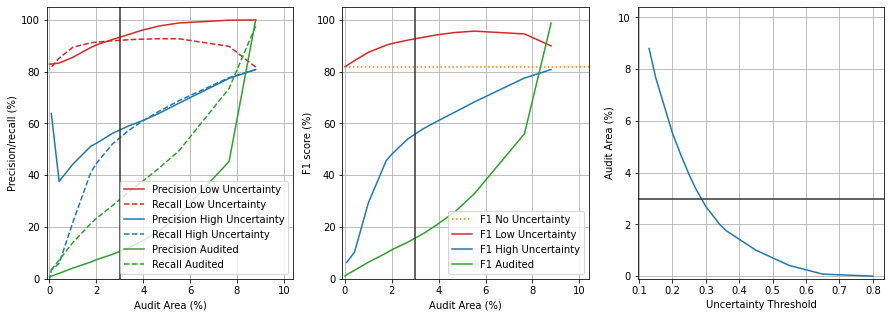

In [95]:
trainer.plotUncertaintyAA()

Text(0, 0.5, 'UEO')

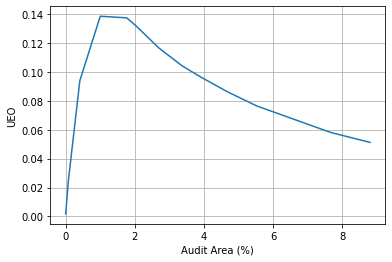

In [103]:
plt.plot(trainer.m['AA']*100, trainer.m['UEO'], label="UEO")
plt.grid()
plt.xlabel('Audit Area (%)')
plt.ylabel('UEO')

In [96]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(53305563,) (53305563,)


ic| label_current_deforestation_high_uncertainty.shape: (828438,)
    predicted_high_uncertainty.shape: (828438,)
ic| TP_H + FN_H + FP_H + TN_H: 828438
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 828438
    len(label_mask_current_deforestation): 54134001


cm_correct [[52632988    72129]
 [   55063   545383]]
cm_incorrect [[643999  50175]
 [ 84967  49297]]
[0.88319417 0.9082965  0.74231057 0.01530347 0.4955867  0.36716469
 0.14141666]
0.6176798867836452
threshold 0.6176798867836452
(54052409,) (54052409,)


ic| label_current_deforestation_high_uncertainty.shape: (81592,)
    predicted_high_uncertainty.shape: (81592,)
ic| TP_H + FN_H + FP_H + TN_H: 81592
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 81592
    len(label_mask_current_deforestation): 54134001


cm_correct [[53210181   121910]
 [  126075   594243]]
cm_incorrect [[66806   394]
 [13955   437]]
[0.82977101 0.82497314 0.808813   0.00150722 0.52587244 0.03036409
 0.04353763]
0.23685977356729035
threshold 0.23685977356729035
(51799265,) (51799265,)


ic| label_current_deforestation_high_uncertainty.shape: (2334736,)
    predicted_high_uncertainty.shape: (2334736,)


cm_correct [[51340271    12795]
 [   32710   413489]]


ic| TP_H + FN_H + FP_H + TN_H: 2334736
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 2334736
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1936716  109509]
 [ 107320  181191]]
[0.9699848  0.9266919  0.56279212 0.04312883 0.62329205 0.62802112
 0.0910954 ]
0.266693963054163
threshold 0.266693963054163
(52262403,) (52262403,)


ic| label_current_deforestation_high_uncertainty.shape: (1871598,)
    predicted_high_uncertainty.shape: (1871598,)


cm_correct [[51744937    26011]
 [   37431   454024]]


ic| TP_H + FN_H + FP_H + TN_H: 1871598
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1871598
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1532050   96293]
 [ 102599  140656]]
[0.94581437 0.92383636 0.61796355 0.03457343 0.59361297 0.5782245
 0.10278444]
0.3074958481642873
threshold 0.3074958481642873
(52755152,) (52755152,)


ic| label_current_deforestation_high_uncertainty.shape: (1378849,)
    predicted_high_uncertainty.shape: (1378849,)
ic| TP_H + FN_H + FP_H + TN_H: 1378849
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1378849
    len(label_mask_current_deforestation): 54134001


cm_correct [[52172688    42791]
 [   43993   495680]]
cm_incorrect [[1104299   79513]
 [  96037   99000]]
[0.9205324  0.91848212 0.67466075 0.02547103 0.55458146 0.50759599
 0.1197776 ]
0.3360761742309462
threshold 0.3360761742309462
(53009854,) (53009854,)


ic| label_current_deforestation_high_uncertainty.shape: (1124147,)
    predicted_high_uncertainty.shape: (1124147,)
ic| TP_H + FN_H + FP_H + TN_H: 1124147
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1124147
    len(label_mask_current_deforestation): 54134001


cm_correct [[52390018    53612]
 [   48127   518097]]
cm_incorrect [[886969  68692]
 [ 91903  76583]]
[0.90622502 0.9150036  0.70517211 0.02076601 0.52715884 0.45453628
 0.13100321]
0.2873230305118544
threshold 0.2873230305118544
(52532708,) (52532708,)


ic| label_current_deforestation_high_uncertainty.shape: (1601293,)
    predicted_high_uncertainty.shape: (1601293,)
ic

cm_correct [[51980618    34520]
 [   40797   476773]]
cm_incorrect [[1296369   87784]
 [  99233  117907]]


| TP_H + FN_H + FP_H + TN_H: 1601293
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1601293
    len(label_mask_current_deforestation): 54134001


[0.9324849  0.92117588 0.64892679 0.02958017 0.57322391 0.54299991
 0.11154472]
0.2871497918317989
threshold 0.2871497918317989
(52530539,) (52530539,)


ic| label_current_deforestation_high_uncertainty.shape: (1603462,)
    predicted_high_uncertainty.shape: (1603462,)
ic

cm_correct [[51978736    34444]
 [   40767   476592]]
cm_incorrect [[1298251   87860]
 [  99263  118088]]


| TP_H + FN_H + FP_H + TN_H: 1603462
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1603462
    len(label_mask_current_deforestation): 54134001


[0.93259966 0.92120172 0.64868043 0.02962024 0.57338746 0.54330553
 0.11147079]
0.27933636050679017
threshold 0.27933636050679017
(52433256,) (52433256,)


ic| label_current_deforestation_high_uncertainty.shape: (1700745,)
    predicted_high_uncertainty.shape: (1700745,)


cm_correct [[51894020    31245]
 [   39562   468429]]


ic| TP_H + FN_H + FP_H + TN_H: 1700745
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1700745
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1382967   91059]
 [ 100468  126251]]
[0.93746923 0.92212067 0.63756993 0.03141732 0.58097188 0.55686114
 0.10811255]
0.28469958897592046
threshold 0.28469958897592046
(52500682,) (52500682,)


ic| label_current_deforestation_high_uncertainty.shape: (1633319,)
    predicted_high_uncertainty.shape: (1633319,)
ic

cm_correct [[51952836    33398]
 [   40391   474057]]
cm_incorrect [[1324151   88906]
 [  99639  120623]]


| TP_H + FN_H + FP_H + TN_H: 1633319
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1633319
    len(label_mask_current_deforestation): 54134001


[0.9341853  0.92148672 0.64523009 0.03017178 0.57568642 0.54763418
 0.11044703]
0.2851641289611872
threshold 0.2851641289611872
(52506394,) (52506394,)


ic| label_current_deforestation_high_uncertainty.shape: (1627607,)
    predicted_high_uncertainty.shape: (1627607,)
ic

cm_correct [[51957769    33615]
 [   40470   474540]]
cm_incorrect [[1319218   88689]
 [  99560  120140]]


| TP_H + FN_H + FP_H + TN_H: 1627607
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1627607
    len(label_mask_current_deforestation): 54134001


[0.93384892 0.921419   0.64588749 0.03006626 0.57530324 0.5468366
 0.1106246 ]
0.28565459612840655
threshold 0.28565459612840655
(52512444,) (52512444,)


ic| label_current_deforestation_high_uncertainty.shape: (1621557,)
    predicted_high_uncertainty.shape: (1621557,)
ic

cm_correct [[51962990    33837]
 [   40560   475057]]
cm_incorrect [[1313997   88467]
 [  99470  119623]]


| TP_H + FN_H + FP_H + TN_H: 1621557
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1621557
    len(label_mask_current_deforestation): 54134001


[0.93350875 0.92133696 0.64659117 0.0299545  0.57486184 0.54599188
 0.11081492]
0.2855187370125625
threshold 0.2855187370125625
(52510729,) (52510729,)


ic| label_current_deforestation_high_uncertainty.shape: (1623272,)
    predicted_high_uncertainty.shape: (1623272,)


cm_correct [[51961506    33776]
 [   40528   474919]]


ic| TP_H + FN_H + FP_H + TN_H: 1623272
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623272
    len(label_mask_current_deforestation): 54134001


cm_incorrect [[1315481   88528]
 [  99502  119761]]
[0.93360265 0.9213731  0.64640334 0.02998618 0.57497515 0.54619794
 0.11076382]
0.28543660399602105
threshold 0.28543660399602105
(52509722,) (52509722,)


ic| label_current_deforestation_high_uncertainty.shape: (1624279,)
    predicted_high_uncertainty.shape: (1624279,)
ic

cm_correct [[51960659    33728]
 [   40518   474817]]
cm_incorrect [[1316328   88576]
 [  99512  119863]]


| TP_H + FN_H + FP_H + TN_H: 1624279
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1624279
    len(label_mask_current_deforestation): 54134001


[0.93367745 0.92137542 0.64626451 0.03000478 0.57505073 0.54638405
 0.11073608]
0.2853803505137543
threshold 0.2853803505137543
(52508994,) (52508994,)


ic| label_current_deforestation_high_uncertainty.shape: (1625007,)
    predicted_high_uncertainty.shape: (1625007,)
ic

cm_correct [[51960015    33701]
 [   40510   474768]]
cm_incorrect [[1316972   88603]
 [  99520  119912]]


| TP_H + FN_H + FP_H + TN_H: 1625007
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1625007
    len(label_mask_current_deforestation): 54134001


[0.93372064 0.92138224 0.64619782 0.03001823 0.57507613 0.54646542
 0.11071152]
0.28546994156306343
threshold 0.28546994156306343
(52510150,) (52510150,)


ic| label_current_deforestation_high_uncertainty.shape: (1623851,)
    predicted_high_uncertainty.shape: (1623851,)
ic

cm_correct [[51961015    33747]
 [   40524   474864]]
cm_incorrect [[1315972   88557]
 [  99506  119816]]


| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation): 54134001
ic| self.threshold_optimal: 0.28546994156306343


[0.9336487  0.92137186 0.64632848 0.02999688 0.57500732 0.54630178
 0.11074764]


In [97]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.28546994156306343
(52510150,) (52510150,)


ic| label_current_deforestation_high_uncertainty.shape: (1623851,)
    predicted_high_uncertainty.shape: (1623851,)
ic

cm_correct [[51961015    33747]
 [   40524   474864]]
cm_incorrect [[1315972   88557]
 [  99506  119816]]


| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation): 54134001
ic| TP_H + FN_H + FP_H + TN_H: 1623851
    len(label_mask_current_deforestation): 54134001


[0.9336487  0.92137186 0.64632848 0.02999688 0.57500732 0.54630178
 0.11074764]
threshold 0.28546994156306343
(54134001,) (54134001,)


ic| self.m_optimal: {'AA': array([0.02999688]),
                     'UEO': array([0.11074764]),
                     'f1': 81.93,
                     'f1_H': array([0.56028712]),
                     'f1_L': array([0.92746966]),
                     'precision_H': array([0.57500732]),
                     'precision_L': array([0.9336487]),
                     'recall_H': array([0.54630178]),
                     'recall_L': array([0.92137186]),
                     'recall_Ltotal': array([0.64632848])}
ic| self.m_audited_optimal: {'f1': array([0.94922138]),
                             'precision': array([0.95363996]),
                             'recall': array([0.94484354])}


cm_audited [[53365544    33747]
 [   40524   694186]]
[0.95363996 0.94484354]


{'metrics': {'precision_L': array([0.9336487]),
  'recall_L': array([0.92137186]),
  'recall_Ltotal': array([0.64632848]),
  'AA': array([0.02999688]),
  'precision_H': array([0.57500732]),
  'recall_H': array([0.54630178]),
  'UEO': array([0.11074764]),
  'f1_L': array([0.92746966]),
  'f1_H': array([0.56028712]),
  'f1': 81.93},
 'metrics_audited': {'precision': array([0.95363996]),
  'recall': array([0.94484354]),
  'f1': array([0.94922138])},
 'exp': 185}